### 4-1 k-Nearest Neighbours

**kNN算法的思想:**  
给出特征空间，给出一个新的样本点，找出这个样本点最近的k个点，这k个点对样本点投票，来决定样本点的结果。  

例如：看一个肿瘤是恶性还是良性，找到与该肿瘤特征最接近的k个样本，如果它们之中恶性占大多数，则判断该肿瘤是恶性。  

两个样本点如果足够相似的话，就可能属于同一个类别。


**显然，在这里可以解决监督学习中的分类问题，实际上也可以解决回归问题**

**例子**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
random.seed(1)
raw_data_x  = [random.uniform(1,9) for i in range(20)]
raw_data_x
random.seed(1)
raw_data_y = [random.randint(0,1) for i in range(10)]
raw_data_y
type(raw_data_y)

list

In [10]:
X_train = np.array(raw_data_x).reshape(10,2)#10*2矩阵
y_train = np.array(raw_data_y)#向量
y_train

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [9]:
#预测样本
np.random.seed(50)
x=np.random.uniform(1,9,(2))#只有一个维数，维度是2,只有两个值
x

array([4.95681316, 2.82466484])

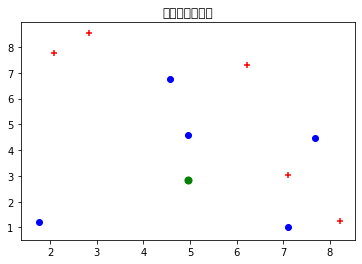

In [12]:
#观察样本空间
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='red',marker = "+")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='blue',marker = "o")
plt.scatter(x[0],x[1],c="g",s=50)
plt.title("特征空间的样子")
plt.show()

**kNN的过程**

In [13]:
from math import sqrt
distances = []#投票：计算向量的欧拉距离，即两个样本之间的对应特征值之差的平方和
for x_train in X_train:#得到的是每一个样本的特征向量
    d = sqrt(np.sum((x_train-x)**2))    #向量作减法,每个元素再平方，求和再开方
    distances.append(d)
distances

[5.73196617630797,
 2.164178618545491,
 1.7712762319002053,
 4.657647564274919,
 3.5820755433754923,
 3.1828342612810183,
 2.8024831642235215,
 3.96724026532386,
 6.118973196629965,
 3.6178293989697723]

In [14]:
distances = [sqrt(np.sum((x_train-x)**2)) for x_train in X_train]
np.argsort(distances)#从小到大排序但是返回索引，最近的是2，1，6...

array([2, 1, 6, 5, 4, 9, 7, 3, 0, 8], dtype=int64)

In [15]:
k=4 #设定投票的人，4个人

In [16]:
topK_y = [y_train[i] for i in np.argsort(distances)[:k] ]
topK_y

[1, 0, 1, 1]

**投票：该样本属于1类**

In [17]:
from collections import Counter
votes = Counter(topK_y)
votes #用于统计（元素：票数）

Counter({1: 3, 0: 1})

In [18]:
votes.most_common(2) #(票数最高元素是什么，票数是多少)

[(1, 3), (0, 1)]

In [ ]:
prodict_y = votes.most_common(1)[0][0] #（元素是谁） 选出最高票的元素、列表的第一个元素、元组的第一个元素即最高票的值

### 4-2 scikit-learn中的机器学习算法封装

**使用sklearn的步骤**
* 创建实例
* 训练 fit
* 预测 predict

**封装成自己的函数**

In [22]:
import random
import numpy as np
np.random.seed(100)
X_train=np.random.uniform(1,10,(10,2))
np.random.seed(2)
y_train=np.random.randint(0,2,(10))
np.random.seed(3)
x=np.random.uniform(1,10,(2))
x

array([5.95718112, 7.3733304 ])

In [20]:
x.reshape(1,-1)

array([[5.95718112, 7.3733304 ]])

In [23]:
%run kNN_function/kNN.py

In [24]:
prodict_y = kNN_classify(6,X_train,y_train,x)

In [25]:
prodict_y

0

**使用sklearn**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6) #创建机器学习实例，k=6

In [28]:
kNN_classifier.fit(X_train,y_train)  #首先要进行fit训练

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [29]:
y_predict = kNN_classifier.predict(x.reshape(1,-1))#设置两个维度，第一个维度只有一个数据，第二个维度机器判断，有两个数据

In [30]:
y_predict[0]

0

**重新整理我们的kNN的代码 在kNN文件夹内 模仿sklearn封装**

In [34]:
%run playML/kNNClassifier.py

In [35]:
np.random.seed(100)
X_train=np.random.uniform(1,10,(10,2))
np.random.seed(20)
y_train=np.random.randint(0,2,(10))
np.random.seed(30)
x=np.random.uniform(1,10,(5,2))

In [36]:
knn_clf = kNNClassifier(k=5)

In [37]:
knn_clf.fit(X_train,y_train)

In [39]:
y_predict = knn_clf.predict(x)

In [40]:
y_predict

array([1, 1, 1, 1, 1])

### 4-3 判断机器学习算法的性能

**将整个数据集分成两部分，一部分作为训练数据，训练出模型，还有部分作为测试数据；\
这样做是为了防止训练得到的模型在真实环境中使用造成问题。**


**测试我们的代码**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [42]:
iris = datasets.load_iris()

In [45]:
X=iris.data
X.shape

150

In [44]:
y=iris.target
y.shape

(150,)

**train_test_split** \
将一部分数据用于训练，一部分数据用于测试

In [49]:
shuffle_indexes = np.random.permutation(len(X))#将索引打乱排

In [47]:
shuffle_indexes

array([ 57,  88,  67,  74,  38, 118,  80,   3,  63, 141,  53,  20,  37,
       108,  99,   5,   8,  92,  65, 122, 125,   0,  94,  77,  24,  96,
        59,   1,  98,  83,  66,  21,  85,  42,  50,  68,  32, 147, 101,
       142,   2, 129, 148,  12,  89, 140,  35, 121,  84, 145, 119,  81,
       137,   7, 136,  14, 124, 139,  70,  72, 109,  87, 103, 107,   6,
       131, 130, 106,  86,  97, 117,  73, 115,  29, 114,  23,  31,  82,
       110, 135,  48,  71,  45, 111,  58,  17, 146,  10, 100,   4, 138,
       127, 126, 123,  16,  56,  41,  51,  76,  60,  28,  43,  79,  34,
        61,  44,  52,  93,  49,  30,  19, 133, 132,  26,  90, 105,  69,
       112,  54,  25,  40,  22,  36, 128,  47, 120,  33,   9,  39,  95,
        75, 104,  78,  91, 113,  55,  13,  15,  11, 143,  64,  46,  27,
        62, 134, 144, 102, 116, 149,  18])

In [50]:
test_ratio = 0.2#取0.2的索引作为测试
test_size = int(len(X)*test_ratio)

In [51]:
test_size

30

In [52]:
test_indexes = shuffle_indexes[:test_size] 
train_indexes = shuffle_indexes[test_size:]
X_train = X[train_indexes]
y_train = y[train_indexes]
X_test = X[test_indexes]
y_test = y[test_indexes]

In [53]:
print(X_train.shape,y_train.shape)

(120, 4) (120,)


**使用我们封装好的算法**

In [55]:
from playML.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [29]:
print(X_train.shape,y_train.shape)

(1438, 64) (1438,)


In [30]:
from playML.kNNClassifier import kNNClassifier

In [31]:
my_knn_clf = kNNClassifier(k=4)

In [32]:
my_knn_clf.fit(X_train,y_train)

In [33]:
y_predict = my_knn_clf.predict(X_test)

In [34]:
y_predict

array([3, 0, 7, 6, 5, 0, 7, 7, 3, 4, 2, 9, 8, 4, 7, 8, 6, 8, 0, 6, 7, 2,
       5, 6, 5, 6, 5, 6, 1, 6, 4, 6, 8, 7, 7, 6, 4, 8, 5, 4, 0, 6, 3, 9,
       7, 3, 8, 9, 1, 2, 2, 7, 2, 6, 0, 6, 5, 6, 3, 0, 8, 8, 6, 6, 1, 7,
       1, 1, 2, 8, 3, 7, 2, 8, 6, 9, 0, 1, 8, 6, 1, 2, 4, 3, 9, 3, 1, 7,
       9, 5, 8, 8, 1, 7, 8, 3, 2, 0, 2, 5, 0, 5, 9, 3, 2, 6, 1, 6, 5, 0,
       2, 7, 4, 0, 9, 2, 4, 5, 7, 2, 4, 2, 9, 6, 9, 9, 0, 7, 6, 1, 0, 5,
       1, 7, 3, 5, 9, 7, 0, 9, 8, 7, 4, 5, 4, 4, 4, 3, 1, 8, 8, 6, 4, 3,
       9, 9, 6, 0, 3, 8, 3, 4, 2, 7, 8, 6, 1, 3, 1, 7, 9, 7, 6, 6, 1, 6,
       8, 9, 5, 2, 6, 2, 0, 4, 0, 8, 2, 5, 8, 1, 1, 8, 9, 5, 0, 5, 8, 4,
       2, 4, 7, 3, 6, 6, 4, 6, 7, 2, 5, 5, 2, 6, 6, 0, 7, 9, 0, 3, 5, 3,
       5, 0, 3, 1, 9, 9, 4, 4, 1, 4, 0, 6, 5, 3, 0, 8, 6, 7, 2, 1, 0, 7,
       9, 6, 9, 8, 0, 1, 5, 8, 3, 6, 3, 2, 3, 6, 7, 9, 2, 6, 4, 7, 2, 1,
       0, 8, 8, 9, 8, 6, 0, 2, 0, 6, 4, 0, 1, 2, 8, 9, 9, 5, 1, 3, 6, 4,
       1, 4, 7, 7, 4, 5, 2, 8, 9, 6, 6, 4, 3, 8, 9,

In [35]:
sum(y_predict==y_test)/len(y_test)

0.9888579387186629

**使用sklearn中的train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [ ]:
kNN_classifier.fit(X_train,y_train)

In [ ]:
y_predict = kNN_classifier.predict(X_test)

In [ ]:
p = sum(y_predict==y_test)/len(y_test)
p

### 4-4 分类准确度

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits.data
X.shape#一共有1797个矩阵，每个矩阵由64个像素点的颜色深度数据组成，可以对应一个数字

(1797, 64)

In [7]:
y = digits.target

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
some_digit = X[168] # 选择第168行
some_digit #每一个像素点颜色深度

array([ 0.,  0.,  6., 15., 13.,  3.,  0.,  0.,  0.,  0., 13., 14., 15.,
       12.,  0.,  0.,  0.,  0., 14., 11., 13., 15.,  5.,  0.,  0.,  0.,
        9., 16., 15.,  8.,  0.,  0.,  0.,  2., 16., 16., 16.,  2.,  0.,
        0.,  0.,  8., 16.,  2., 14., 10.,  0.,  0.,  0.,  5., 16.,  9.,
       14., 11.,  0.,  0.,  0.,  0.,  8., 14., 13.,  2.,  0.,  0.])

In [11]:
y[168]

8

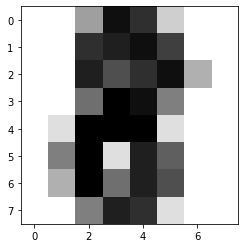

In [13]:
#将某一行的特征可视化
some_digit_image = some_digit.reshape(8,8) # 这里的特征：将一个数字分成8*8的小方格
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)#binary白纸黑字
plt.show()

In [14]:
from playML.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_ratio=0.2)

In [36]:
from playML.kNNClassifier import kNNClassifier

In [37]:
my_knn_clf = kNNClassifier(k=20)

In [38]:
my_knn_clf.fit(X_train,y_train)

In [39]:
y_predict = my_knn_clf.predict(X_test)

In [40]:
sum(y_predict == y_test)/len(y_test)

0.9777158774373259

In [42]:
#使用封装后的函数metrics
from kNN.metrics import accuracy_score

accuracy_score(y_predict,y_test)

0.9777158774373259

In [43]:
#使用封装在knn算法中的函数，这样就没有必要将y_predict先计算出来了

In [44]:
my_knn_clf.score(X_test,y_test)

0.9777158774373259

**用scikit-learn中的accuracy_score完成整个过程**

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

In [47]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
y_predict = knn_clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.9888888888888889

In [50]:
knn_clf.score(X_test,y_test)

0.9888888888888889

### 4-5 超参数

超参数：算法运行前要决定的参数如k；创建对象时需要用到的参数 \
模型参数：算法过程中学习的参数（kNN算法中没有）\
调参：一般指的是超参数

In [51]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [52]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [54]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.9833333333333333

**寻找最好的k**

In [55]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    score = knn_clf.score(X_test,y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = ",best_k)
print("best_score = ",best_score)

best_k= 7
best_score= 0.9916666666666667


**其实还有一个超参数，考虑了周围结点的距离的权重，更合理，并且可以解决平票的情况\
在neighbors中存在这样的参数method，一个没有加入距离权重，一个加入了距离的权重**

In [56]:
best_score = 0.0
best_k = -1
best_method = ""
for method in ["uniform","distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score>best_score:
            best_k=k
            best_score=score
            best_method = method

print("best_k=",best_k)
print("best_score=",best_score)
print("best_method=",best_method)

best_k= 7
best_score= 0.9916666666666667
best_method= uniform


**除了欧拉距离是p参数为2的特殊的明可夫斯基距离，更多关于距离的定义**

曼哈顿距离、明可夫斯基距离，从而又多了超参数p

In [57]:
#查找最佳的明可夫斯基距离的参数p

In [ ]:
%%time
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for p in range(1,6): 
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights="distance",p=p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score>best_score:
            best_k=k
            best_score=score
            best_p = p
print("best_k=",best_k)
print("best_score=",best_score)
print("best_p=",p)

**以上搜索称为网格搜索，即运行过程形成了k*p的网格\
有更快的实现网格参数的方法**

### 4-6 网格搜索与k邻近算法中更多的超参数

Grid search

In [58]:
#对于上一节中的参数创建网格参数：以字典列表的方式
param_grid =[
    {
        "weights":["uniform"], # uniform 的意思是 均匀的 即每一个投票的样本点的权重不随距离改变
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        "weights":["distance"], #  即每一个投票的样本点的权重随着距离改变
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]

In [59]:
knn_clf = KNeighborsClassifier()#这里不需要任何参数

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_search = GridSearchCV(knn_clf,param_grid)#分别传入分类器实例和参数列表
#传入创建的分类器实例和网格搜索参数，新建一个网格搜索实例

In [62]:
%% time
grid_search.fit(X_train,y_train)
#第一步同样要fit

Wall time: 1min 4s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#grid_search = GridSearchCV(knn_clf,param_grid，n_jobs，verbose=2)
#n_jobs指用 计算机的几个核用于计算,verbose=2越大，输出的值越强大

In [63]:
%%time
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   10.7s


Wall time: 14 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [64]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=3,
                     weights='distance')

In [ ]:
#CV是交叉验证，更准确

In [65]:
grid_search.best_score_

0.9888646922183508

In [66]:
grid_search.best_params_

{'n_neighbors': 4, 'p': 3, 'weights': 'distance'}

In [67]:
knn_clf = grid_search.best_estimator_

In [68]:
knn_clf.score(X_test,y_test)

0.9833333333333333

**更多的距离定义**

向量空间余弦相似度 Cosine Similarity\
调整余弦相似度 Adjusted Cosine Similarity\
皮尔森相关系数 Pearson Correlation Coefficient\
Jaccard相似系数 Jaccard Coefficient

### 4-7 数据归一化 

在观察肿瘤性质的例子中，有两个特征：肿瘤大小和发现时间。这两个特征的量纲完全不同，在计算如欧拉距离时，会被其中一个特征主导。所以要对数据归一化，将所有数据映射到同一尺度中。


**最值归一化normalization**：把所有数据映射到0-1之间,适合有明显边界的数据，如学生分数，如图像识别中的图像像素。


In [71]:
x = np.random.randint(0,100,size=100)

In [72]:
x

array([79, 54, 81, 73, 68, 48,  7, 12,  8, 22, 51, 39, 36, 46, 91, 97, 23,
       25, 48, 34, 79, 45, 48, 77, 23, 78, 42, 38, 13, 98, 73, 31, 68, 57,
       88, 77, 34, 72,  1, 95, 63, 38, 15, 74, 26, 41, 84,  7, 59, 56, 19,
        7, 79, 23, 54, 54, 40,  0, 95, 96, 47, 22, 42, 35, 93, 91, 69, 21,
       22, 34, 78, 96, 58, 95,  5,  2, 57, 76, 90, 33, 96, 34, 64, 45,  9,
       79, 95, 28, 34,  3, 74, 85,  5, 10, 58, 44, 76, 98, 77, 80])

In [73]:
(x - np.min(x))/(np.max(x) - np.min(x))

array([0.80612245, 0.55102041, 0.82653061, 0.74489796, 0.69387755,
       0.48979592, 0.07142857, 0.12244898, 0.08163265, 0.2244898 ,
       0.52040816, 0.39795918, 0.36734694, 0.46938776, 0.92857143,
       0.98979592, 0.23469388, 0.25510204, 0.48979592, 0.34693878,
       0.80612245, 0.45918367, 0.48979592, 0.78571429, 0.23469388,
       0.79591837, 0.42857143, 0.3877551 , 0.13265306, 1.        ,
       0.74489796, 0.31632653, 0.69387755, 0.58163265, 0.89795918,
       0.78571429, 0.34693878, 0.73469388, 0.01020408, 0.96938776,
       0.64285714, 0.3877551 , 0.15306122, 0.75510204, 0.26530612,
       0.41836735, 0.85714286, 0.07142857, 0.60204082, 0.57142857,
       0.19387755, 0.07142857, 0.80612245, 0.23469388, 0.55102041,
       0.55102041, 0.40816327, 0.        , 0.96938776, 0.97959184,
       0.47959184, 0.2244898 , 0.42857143, 0.35714286, 0.94897959,
       0.92857143, 0.70408163, 0.21428571, 0.2244898 , 0.34693878,
       0.79591837, 0.97959184, 0.59183673, 0.96938776, 0.05102

In [77]:
X = np.random.randint(0,100,(50,2))
X

array([[89, 71],
       [15, 63],
       [38,  1],
       [20, 39],
       [54, 95],
       [83, 67],
       [96, 69],
       [50, 35],
       [ 0, 40],
       [12, 23],
       [97, 25],
       [85, 47],
       [48, 40],
       [58, 76],
       [42, 91],
       [12, 35],
       [36, 93],
       [67, 15],
       [99, 12],
       [27, 73],
       [34,  6],
       [28, 85],
       [40, 47],
       [89, 30],
       [93, 94],
       [ 1, 26],
       [67, 14],
       [76, 26],
       [60, 19],
       [77, 16],
       [27,  7],
       [51, 10],
       [15, 29],
       [25, 90],
       [81, 96],
       [38, 45],
       [62, 81],
       [77, 64],
       [74, 18],
       [34, 79],
       [58, 33],
       [ 7, 74],
       [68, 13],
       [51, 43],
       [88,  0],
       [42, 73],
       [71, 98],
       [64, 57],
       [39, 13],
       [72, 58]])

In [78]:
X = np.array(X,dtype=float)

In [79]:
X[:10,:]

array([[89., 71.],
       [15., 63.],
       [38.,  1.],
       [20., 39.],
       [54., 95.],
       [83., 67.],
       [96., 69.],
       [50., 35.],
       [ 0., 40.],
       [12., 23.]])

In [ ]:
#将每一列单独归一化
X[:,0] = (X[:,0]-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0]))

In [ ]:
X[:,1] = (X[:,1]-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1]))

In [ ]:
X[:10,:]

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
np.mean(X[:,0])

In [ ]:
np.std(X[:,0])

**均值方差归一化StandardScaler：**把数据归一到均值为0方差为1的分布中，适用于数据没有明显的边界，有可能存在极端数据值的情况。

In [80]:
X2 = np.random.randint(0,100,(50,2))

In [81]:
X2 = np.array(X2,dtype=float)

In [82]:
X2[:,0] = (X2[:,0]-np.mean(X2[:,0]))/np.std(X2[:,0])

In [83]:
X2[:,1] = (X2[:,1]-np.mean(X2[:,1]))/np.std(X2[:,1])

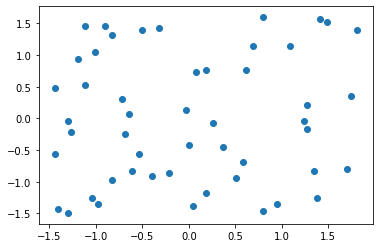

In [84]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [87]:
np.mean(X2[:,1])

-2.2204460492503132e-17

In [88]:
np.std(X2[:,1])

1.0

### 4-8 scikit-learn中的Scaler

对测试数据集,如test_x,如何归一化？

要用训练数据的mean_train和std_train来归一化测试数据。\
为什么呢?\
因为正式环境很可能无法得到所有测试数据的均值方差。\
对数据的归一化也是算法的一部分。

In [89]:
import numpy as np
from sklearn import datasets

In [90]:
iris = datasets.load_iris()

In [91]:
X = iris.data
y = iris.target

In [92]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=666)

In [97]:
#均值方差归一化stardardscaler
from sklearn.preprocessing import StandardScaler # ‘均值方差归一化’

In [98]:
stardardScaler = StandardScaler()

In [99]:
stardardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
stardardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [101]:
stardardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [102]:
X_train_stardard = stardardScaler.transform(X_train)

In [103]:
X_test_stardard = stardardScaler.transform(X_test)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [106]:
knn_clf.fit(X_train_stardard,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [107]:
knn_clf.score(X_test_stardard,y_test)

1.0

**使用自己写的preprocessing模块进行标准归一化standardscaler处理**

In [115]:
from playML.preprocessing import StardardScaler

In [117]:
myStandardScaler = StandardScaler()

In [118]:
myStandardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
myStandardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [121]:
X_train_mystardard = myStandardScaler.transform(X_train)
X_train_mystardard

array([[-0.90616043,  0.93246262, -1.30856471, -1.28788802],
       [-1.15301457, -0.19551636, -1.30856471, -1.28788802],
       [-0.16559799, -0.64670795,  0.22203084,  0.17260355],
       [ 0.45153738,  0.70686683,  0.95898425,  1.50032315],
       [-0.90616043, -1.32349533, -0.40154513, -0.09294037],
       [ 1.43895396,  0.25567524,  0.56216318,  0.30537551],
       [ 0.3281103 , -1.09789954,  1.0723617 ,  0.30537551],
       [ 2.1795164 , -0.19551636,  1.63924894,  1.23477923],
       [-0.78273335,  2.2860374 , -1.25187599, -1.42065998],
       [ 0.45153738, -2.00028272,  0.44878573,  0.43814747],
       [ 1.80923518, -0.42111215,  1.46918276,  0.83646335],
       [ 0.69839152,  0.25567524,  0.90229552,  1.50032315],
       [ 0.20468323,  0.70686683,  0.44878573,  0.57091943],
       [-0.78273335, -0.87230374,  0.10865339,  0.30537551],
       [-0.53587921,  1.38365421, -1.25187599, -1.28788802],
       [-0.65930628,  1.38365421, -1.25187599, -1.28788802],
       [-1.0295875 ,  0.

In [124]:
X_test_mystandard = myStandardScaler.transform(X_test)

### 4-9 更多有关k近邻算法

**优缺点**
* 解决监督学习中的分类问题
* 其实也可以解决回归问题 KNeighborsRegressor专门用于解决回归问题
* 最大的缺点：效率低下，O(m * n)
* 优化：使用树的结构
* 缺点：高度数据相关，如果样本数据中有几个错误值，会使得预测出错
* 缺点：预测结果不具有可解释性
* 维数灾难：随着维数的增加，看似相近的两个点之间的距离会越来越大，降维pca

**课程回顾**
1. 完整数据集分为训练数据集和测试数据集
2. 训练数据集数据归一化Scaler
3. 训练得到模型
4. 测试数据集数据归一化Scaler
5. 测试数据集加入到模型中看预测准确度
6. 为了得到最好的模型，通过网格搜索来确定模型的超参数

![总结](笔记图片/kNN总结.jpg)